<a href="https://colab.research.google.com/github/sumit25chini/Mobile-Price-Range-Prediction-Classification-prediction/blob/main/Mobile_Price_Range_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **⬛ Project Name : Mobile Price Range Prediction**
## **▶ Project Type - Classification**
## **▶ Contribution - Team**
## **◼ Team Member 1 - Aishwarya Hikare**
## **◼ Team Member 2 - Sumit Kumar Mahato**

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **⬛ GitHub Link**

### **◼ Team Member 1 - Aishwarya Hikare**
### **▶ Link :**
### **◼ Team Member 2 - Sumit Kumar Mahato**
### **▶ Link :**

# ⬛ **Problem Statement**

## In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **Data Description** -

## **Attribute Information:**

### ♦ **Battery_power** - Total energy a battery can store in one time measured in mAh

### ♦ **Blue** - Has bluetooth or not

### ♦ **Clock_speed** - speed at which microprocessor executes instructions

### ♦ **Dual_sim** - Has dual sim support or not

### ♦ **Fc** - Front Camera mega pixels

### ♦ **Four_g** - Has 4G or not

### ♦ **Int_memory** - Internal Memory in Gigabytes

### ♦ **M_dep** - Mobile Depth in cm

### ♦ **Mobile_wt**- Weight of mobile phone

### ♦ **N_cores** - Number of cores of processor

### ♦ **Pc** - Primary Camera mega pixels

### ♦ **Px_height** - Pixel Resolution Height

### ♦ **Px_width** - Pixel Resolution Width

### ♦ **Ram** - Random Access Memory in Mega Bytes

### ♦ **Sc_h** - Screen Height of mobile in cm

### ♦ **Sc_w** - Screen Width of mobile in cm

### ♦ **Talk_time** - longest time that a single battery charge will last when  you are

### ♦ **Three_g** - Has 3G or not

### ♦ **Touch_screen** - Has touch screen or not

### ♦ **Wifi** - Has wifi or not

### ♦ **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).


# ⬛ **Import Libraries**

In [124]:
# # let's import the libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [125]:
# Let's mount the google drive for import the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ⬛ **Loading Dataset**

In [126]:
# Load the mobile price range dataset  from drive
mobile_data = pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')

# ▶ **Understand More About The Whole Dataset**

In [127]:
# let's see the whole Dataset
mobile_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [128]:
# Check the data of top  rows to take a glimps of the dataset
mobile_data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [129]:
# View the data of bottom rows
mobile_data.tail(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3



*   **To view a small sample of a Series or the DataFrame object, use the head() and the tail() methods.**

In [130]:
# Get the shape of dataset with rows and columns
print("The shape of our dataset is : ", mobile_data.shape)

The shape of our dataset is :  (2000, 21)



*   **The shape method helps us get an idea of the number of rows and columns present in our data**

*   **In our data set we have 2000 rows and 21 colums**

In [131]:
# Let's understand our column names in our dataset
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [132]:
# Check details information about the data set
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc



*   **We can quickly determine the data type and null values in our dataframes by using the info() method.**

*   **We don't have any object data type in our data set.**

*   **Price_range is our target variable.**


In [133]:
# Check the description of the dataset
mobile_data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


# ⬛  **Cleaning** **Dataset**

## ▶ **Duplicate values**

### ◼ "Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. By removing duplication in our dataset, Time and Money are saved by not sending identical communications multiple times to the same things.

In [134]:
# Check Duplicate Values of dataset
len(mobile_data[mobile_data.duplicated()])

0

In [135]:
# Check the Null values of dataset
mobile_data.isnull().sum().sort_values(ascending = False)

battery_power    0
px_height        0
wifi             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
pc               0
blue             0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
price_range      0
dtype: int64


*    **As we can see, in our mobile_data, we have zero null values. which means the data was well maintained.**

## ▶ **Missing Value**


### ◼ The real-world data often has a lot of missing values. The cause of missing  values can be data corruption or failure to record data.

### ◼ The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values that's why we have to check missing values of dataset.

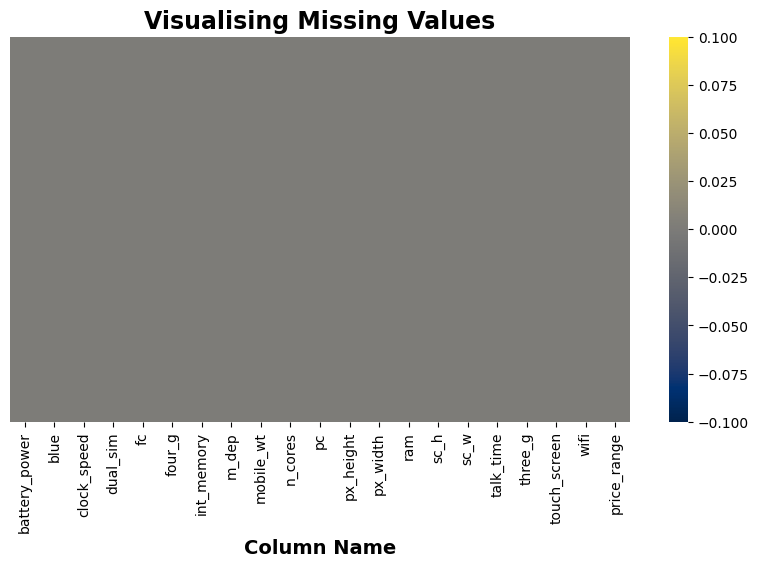

In [136]:
# Check the mising value of dataset
plt.figure(figsize=(10,5))
sns.heatmap(mobile_data.isnull(), cmap='cividis', yticklabels=False)
plt.xlabel("Column Name", size=14, weight="bold")
plt.title("Visualising Missing Values",fontweight="bold",size=17)
plt.show()


◼ In the above dataset after count the missing and duplicate value we came to know that there are no missing and duplicate value present in dataset.


**The target variable labels with according to the values.**

*  **0=Low cost**
*  **1=Medium cost**
*  **2=High cost**
*  **3=Very high cost**

# ⬛ **Data Visualization** **And Processing  On The Dataset**

### ▶  Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.

## **▶ Exploring Dual_Sim Availability in Dataset**

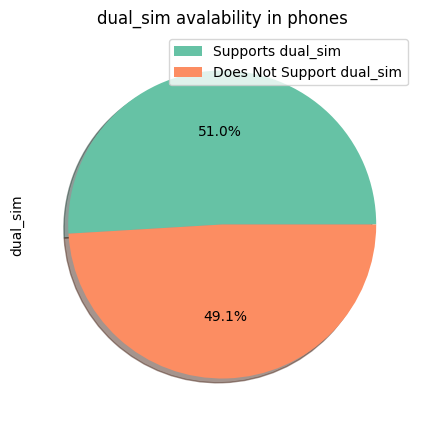

In [137]:
# Visualize the Dual_Sim Availability in  mobile phones
color_palette = sns.color_palette('Set2')
plt.figure(figsize=(8, 5))
mobile_data['dual_sim'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=color_palette,
    shadow=True,
    labeldistance=None,
    explode=[0., 0.])
plt.title('dual_sim avalability in phones')
plt.legend(['Supports dual_sim', 'Does Not Support dual_sim'], loc='upper right')

plt.show()


## ◼ **Observation**
From the following graph show that most of mobile phone is supported dual sim the percent of support dual sim is 51.0% and not supported percentage is 49.1%

## **▶ Exploring the Distribution of Battery Power of different mobile phones**

<Figure size 1500x1200 with 0 Axes>

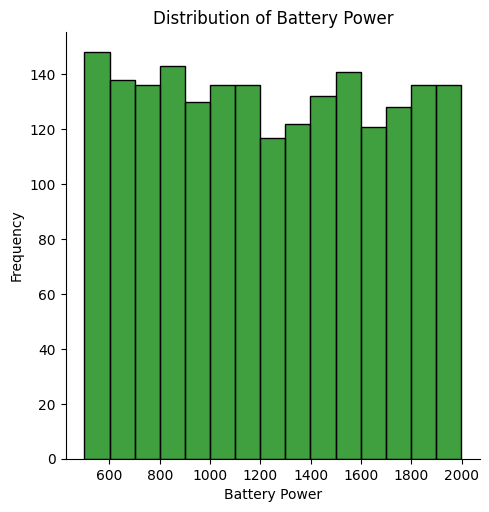

In [138]:
# Visualize the distribution of battery power of Mobile phones
plt.figure(figsize = (15 , 12))
sns.displot(mobile_data["battery_power"], color='green' , edgecolor='black',linewidth=1,
            bins = 15)
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.title('Distribution of Battery Power')
plt.show()

## ◼ **Observation**
From the above graph we see that the high battery power mobile phone is demanding in market by the customer so that the price range of mobile phone incresing according  to the battery power of mobile phone and it's give the  positive impact on market.
Mobile phone with battery power greater than 1300 mAh have a very high cost, and with battery power between 1200 and 1300 mAh fall into the medium and high cost categories.

## **▶ Exploring the Bluetooth Availibility in Mobile phones**

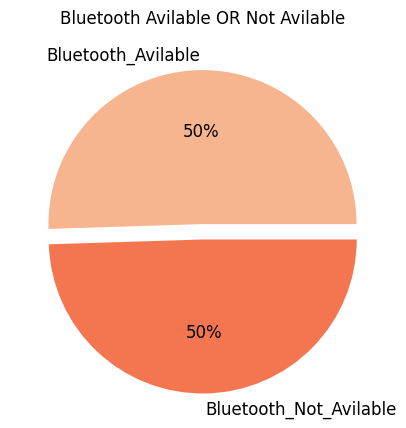

In [139]:
# Visualize the blutooth avaibility in mobile phones
fig = plt.figure(1, figsize=(10,5))
blue_data = [(len(mobile_data[mobile_data.blue==0])),(len(mobile_data[mobile_data.blue==1]))]
blue_keys=["Bluetooth_Avilable","Bluetooth_Not_Avilable"]
explode = [0, 0.1]
palette_color =sns.color_palette('rocket_r')
plt.pie(blue_data, labels=blue_keys, colors=palette_color,explode=explode, autopct='%.0f%%',textprops={'fontsize': 12})
plt.title('Bluetooth Avilable OR Not Avilable')
plt.show()

## ◼ **Observation**
The following pie chart show that their is equal distribution of mobile phone between the blueetooth available or not. This Bluetooth features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions.



## **▶ Exploring the Percentage of each class in Target Feature of Mobile phones**

In [140]:
# Let's have a look at our target variable's counts.
price_range_counts=mobile_data['price_range'].value_counts()
price_range_counts

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

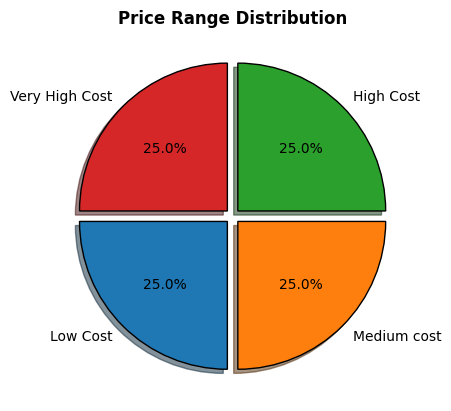

In [141]:
# Visualize the percentage of each class in the target feature
price_counts = mobile_data['price_range'].value_counts()
plt.pie(price_counts, labels = ['Low Cost', 'Medium cost', 'High Cost', 'Very High Cost'], autopct='%1.1f%%', shadow=True, startangle=180, explode=(0.05,0.05,0.05,0.05),
       wedgeprops={"edgecolor":"0",'linewidth': 1,'linestyle': 'solid', 'antialiased': True})
plt.title('Price Range Distribution',fontweight ='bold', size = 12)
plt.show()


## ◼ **Observation**

As the above Each class has an almost equal number of observations for each category. So our target feature is well balance and the accuracy score will be the best evaluation metric for us to select the model.
We can see that our target varibale is equally distributed and their is no need for oversampling or undersampling beacause our data is balanced.



## **▶ Exploring the Price Range VS Internal Memory of the Dataset**

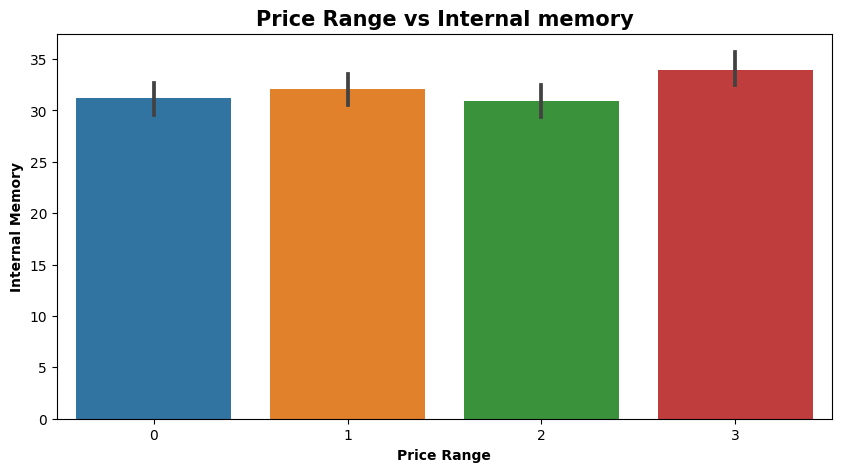

In [142]:
# Visualize the Price Range V/S Internal Memory of the Dataset
plt.figure(figsize=(10,5))
sns.barplot(x="price_range",y="int_memory", data=mobile_data)
plt.xlabel('Price Range', fontweight ='bold')
plt.ylabel('Internal Memory', fontweight ='bold')
# Title of the graph
plt.title('Price Range vs Internal memory', fontweight ='bold', size = 15)
plt.grid(False)
plt.show()

## ◼ **Observation**
According to the graph the dataset show the customer is  highly demand the high space of internal memory and it also affect the price range of mobile phones as their different internal memory avilable in mobile phone.

## **▶ Exploring the 3G And 4G Connectivity of the Different Mobile phones**

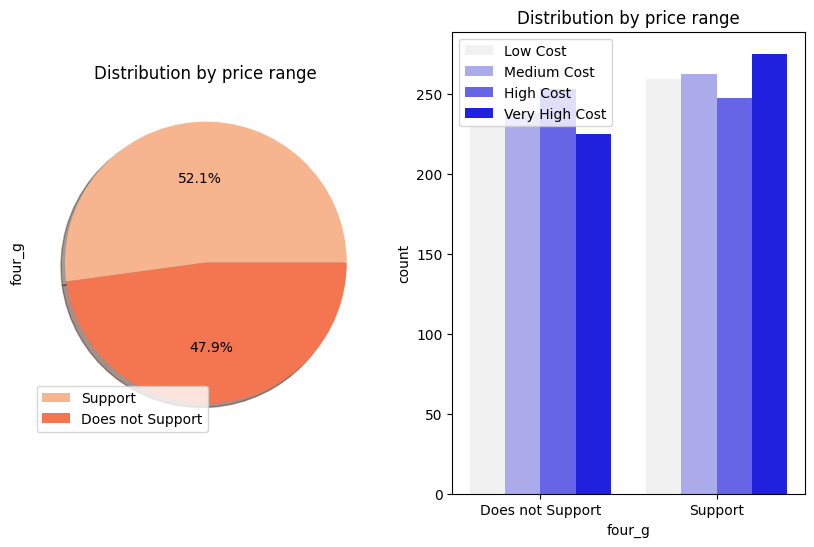

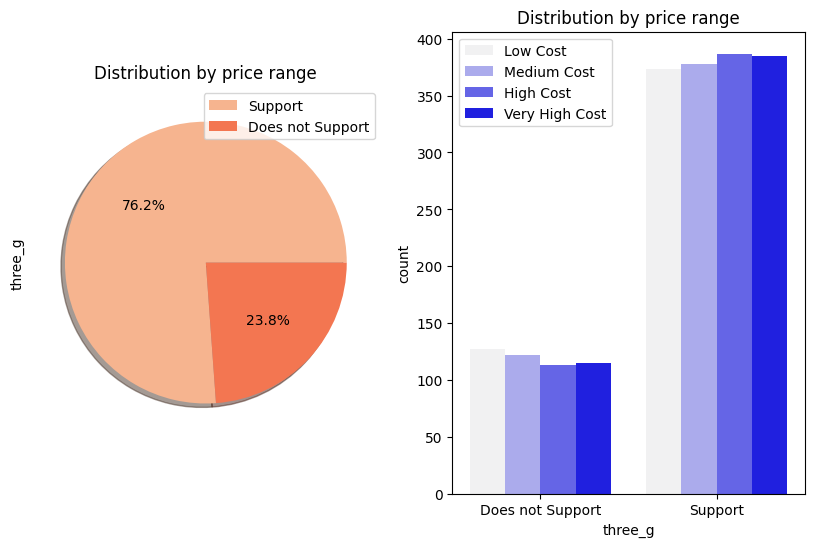

In [143]:
# Visualize the 3G and 4G connectivity in Mobile phones
binary_features = [ 'four_g', 'three_g']
for dataset in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,6))

  mobile_data[dataset].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1,colors=palette_color, shadow=True,labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = dataset, hue = 'price_range', data = mobile_data, ax = ax2, color = 'blue')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(dataset)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])


## ◼ **Observation**

According to the above graph, 4G supported mobile phone is 52.1% and the remaining 47.9% is not supported and 3G supported mobile phone is 76.2% while the remaining 23.8% is not supported So that the 75% of our data has 3G support.

## **▶ Exploring the Relationship between RAM VS Price Range**

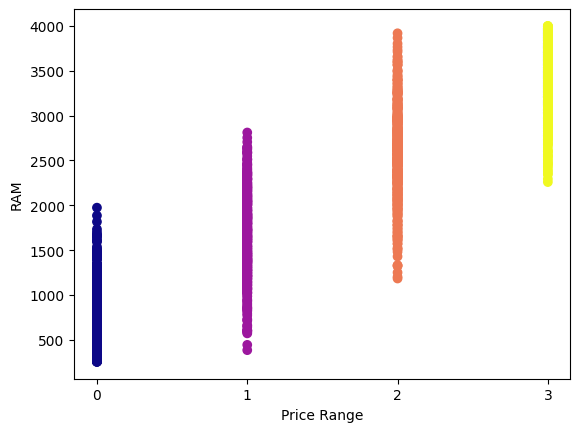

In [144]:
# Visualize the Relationship between RAM vs Price Range
plt.scatter(mobile_data['price_range'],mobile_data['ram'], c = mobile_data['price_range'], cmap = 'plasma')
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.xticks([0, 1, 2, 3])
plt.show()

## ◼ **Observation**
The scatter plot reveals a noticeable positive correlation between RAM and price range, as most of the data points gather towards the upper right corner. This implies that as the price range rises and there is a tendency for the device's RAM to also increase.



## **▶ Exploring the Relationship between Pixel Width / Pixel Height By Price Range**

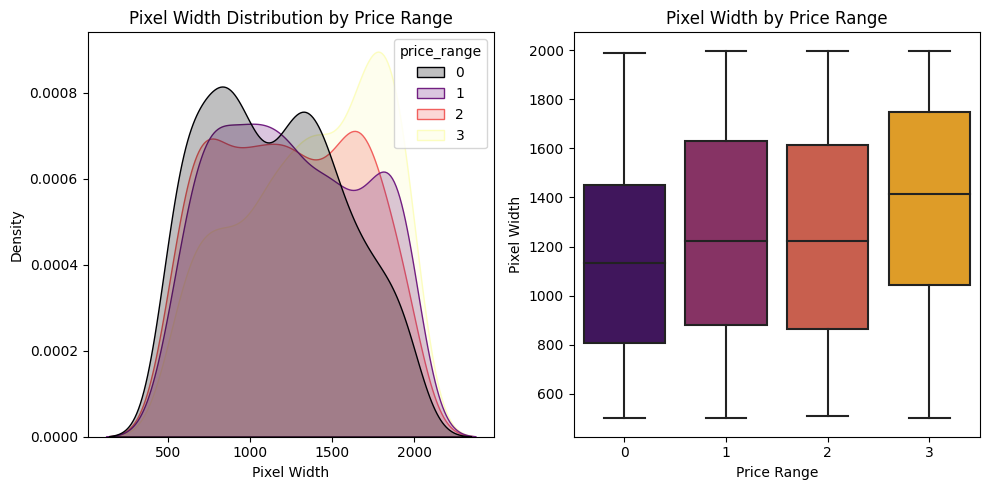

In [145]:
# Visualize the relationship between Pixel Width / Pixel Height by Price Range
# Setting up the figure and axes
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

# Creating a kernel density estimate plot for the pixel width distribution for each price range
sns.kdeplot(data = mobile_data, x = 'px_width', hue = 'price_range', fill = True, common_norm = False, palette = 'magma', ax = axs[0])
axs[0].set_xlabel('Pixel Width')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Width Distribution by Price Range')

# Creating a box plot of pixel width for each price range
sns.boxplot(data = mobile_data, x = 'price_range', y = 'px_width', palette = 'inferno', ax = axs[1])
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Pixel Width')
axs[1].set_title('Pixel Width by Price Range')

# Adjusting the layout and spacing
plt.tight_layout()

# Plotting the graph
plt.show()


## **▶  Pixel_Height By Price Range**

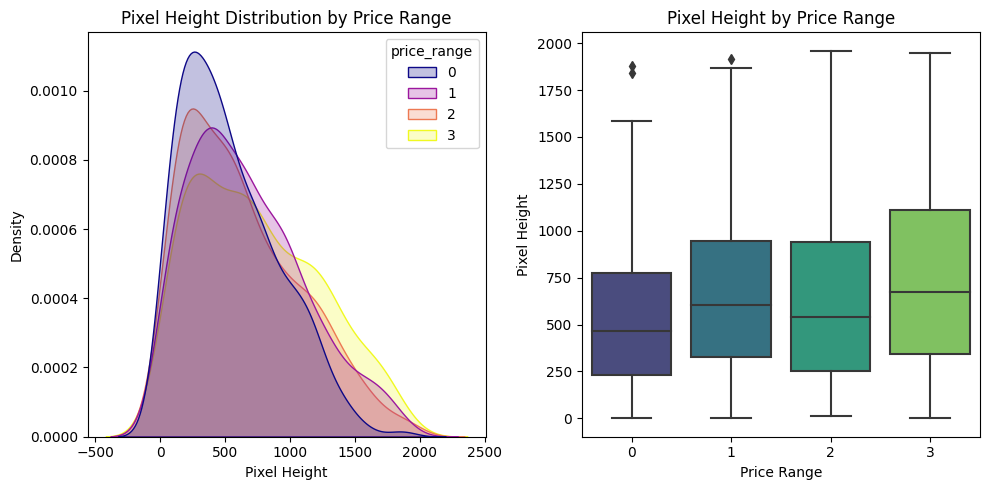

In [146]:
# visualize the pixel_height by price range
# Setting up the figure and axes
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

# Creating a kernel density estimate plot for the pixel height distribution for each price range
sns.kdeplot(data = mobile_data, x = 'px_height', hue = 'price_range', fill = True, common_norm = False, palette = 'plasma', ax = axs[0])
axs[0].set_xlabel('Pixel Height')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Height Distribution by Price Range')

# Creating a box plot of pixel height for each price range
sns.boxplot(data = mobile_data, x = 'price_range', y = 'px_height', palette = 'viridis', ax = axs[1])
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Pixel Height')
axs[1].set_title('Pixel Height by Price Range')

# Adjusting the layout and spacing
plt.tight_layout()

# Plotting the graph
plt.show()

## ◼ **Observation**
From the above representation show that Specifically, mobile phones in the medium and high price ranges exhibit similar pixel widths, the pixel width alone may not be the sole determining factor in pricing mobile phones Other factors, such as processor performance, camera quality, storage capacity, and brand reputation, likely influence the price range.Similarly, there is only minor variation in pixel height as we move from low-cost to high-cost devices and the factors beyond pixel dimensions contribute to price differentiation.


## **▶ Exploring the Mobile Weight VS Price Range**

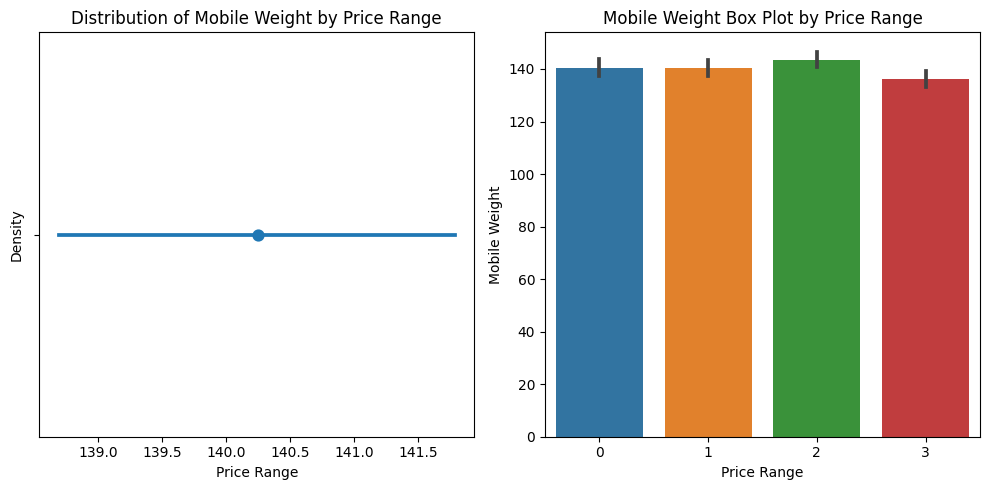

In [182]:
# Visualize the mobile weight vs price Range
# Creating the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1: Kernel density estimation plot
sns.pointplot(data=mobile_data, x='mobile_wt', hue='price_range', ax=axs[0])
axs[0].set_title('Distribution of Mobile Weight by Price Range')
axs[0].set(xlabel='Price Range', ylabel='Density')

# Plot 2: Box plot
sns.barplot(data=mobile_data, x='price_range', y='mobile_wt', ax=axs[1])
axs[1].set_title('Mobile Weight Box Plot by Price Range')
axs[1].set(xlabel='Price Range', ylabel='Mobile Weight')

# Adjusting the spacing between subplots
plt.tight_layout()

# Showing the plot
plt.show()

## ◼ **Observation**
As we  observe  that mobile phones with higher price ranges generally exhibit a lighter weight in comparison to mobile phones with lower price ranges.

## **Exploring the Primary Camera VS Price Range of Mobile phones**

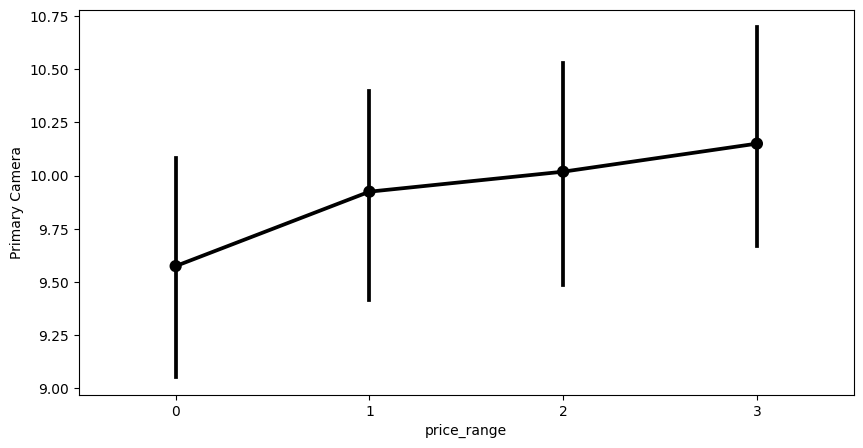

In [148]:
# Visualize the Relationship between primary camera VS price range
plt.figure(figsize=(10,5))
sns.pointplot(y="pc", x="price_range", data=mobile_data , color= 'black')
plt.ylabel("Primary Camera")
plt.show()

## ◼ **Observation**
The following graph show that the price range varies accordingly with the different features of mobile phones and the primary Camera is strong feature which attract  Customer they are generally interested in prime camera of mobile phones and it have also positive impact to the business.

## **▶ Exploring the Dual SIM  VS Price Range**

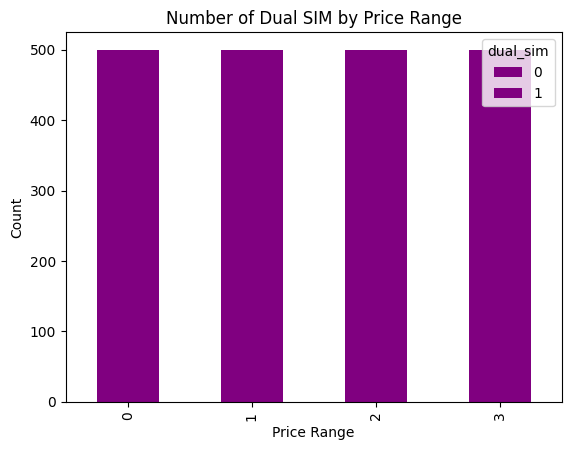

In [149]:
# Visualize the Dual_sim  VS Price Range
sim_count = mobile_data.groupby(['price_range', 'dual_sim']).size().unstack()
sim_count.plot(kind = 'bar', stacked = True, color='purple')

# Adding axis labels and a title
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Number of Dual SIM by Price Range')

# Showing the plot
plt.show()

## ◼ **Observation**
As we see the recent senario of market the customer is highly demanded dual sim mobile phone and abviously it affact the price range of mobile phone in different category.

## ▶ **Exploring The Prince Range VS Talk time**

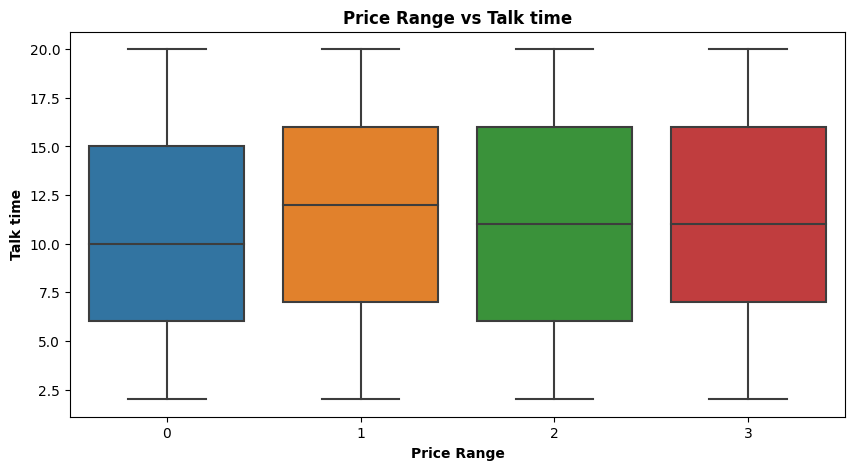

In [150]:
# Visualize the price range VS talk time
plt.figure(figsize=(10,5))
sns.boxplot(x="price_range",y="talk_time", data=mobile_data,)
plt.xlabel('Price Range', fontweight ='bold')
plt.ylabel('Talk time', fontweight ='bold')
plt.grid(False)
plt.title('Price Range vs Talk time', fontweight ='bold')
plt.show()

## ◼ **Observation**

From the following graph show that there is no significant variation in average talk time across different price ranges and the price of a mobile phone may not strongly influence its talk time capability which indicating that customers can expect good battery performance regardless of their budget.

## **▶ Exploring Avalability of the Network and their speed plays role in the Price Range.**

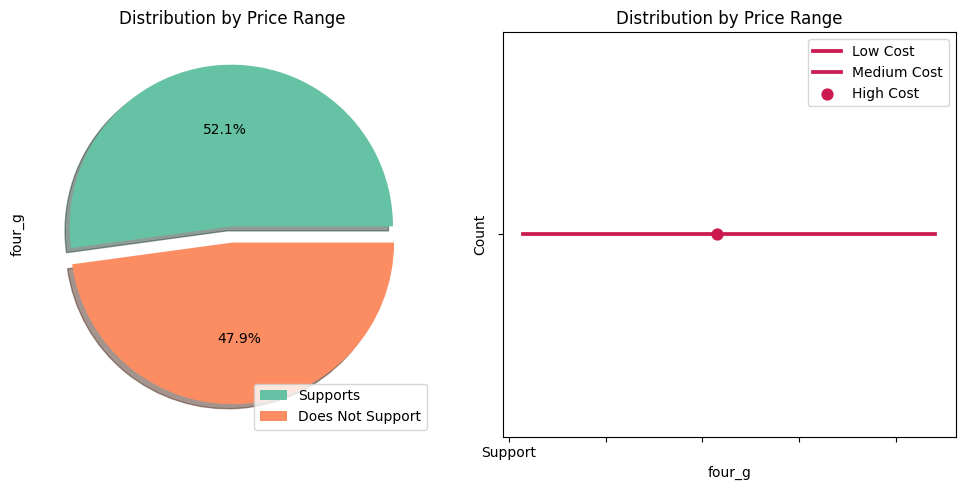

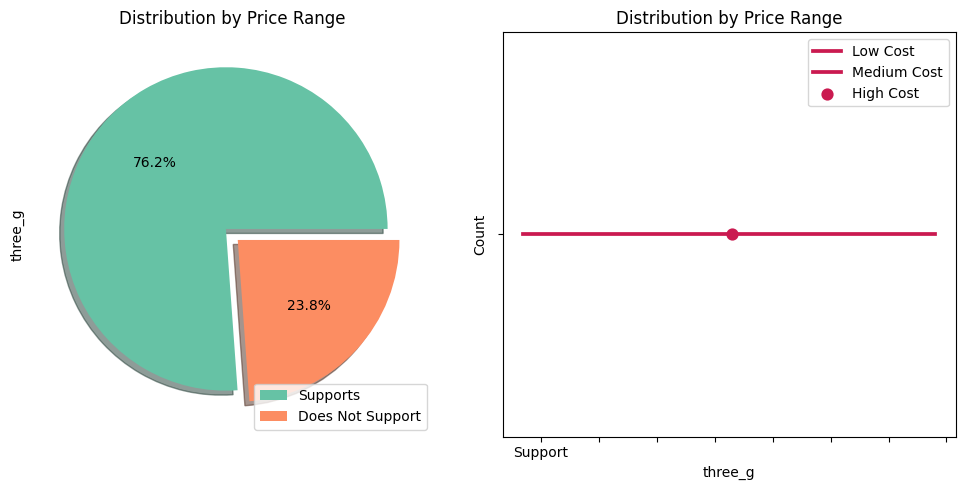

In [151]:
# Visulize the Avalability of the Network and their speed plays role in the price range.
col_palette = sns.color_palette('Set2')

networks = ['four_g', 'three_g']
for dataset in networks:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))


    mobile_data[dataset].value_counts().plot.pie(
        autopct='%1.1f%%',
        ax=ax1,
        colors=col_palette,
        shadow=True,
        labeldistance=None,
        explode=[0.05, 0.05]  # Add explode for visual separation
    )
    ax1.set_title('Distribution by Price Range')
    ax1.legend(['Supports', 'Does Not Support'])

    # Count plot
    sns.pointplot(x=dataset, hue='price_range', data=mobile_data, ax=ax2, palette='rocket_r')
    ax2.set_title('Distribution by Price Range')
    ax2.set_xlabel(dataset)
    ax2.set_ylabel('Count')
    ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
    ax2.set_xticklabels(['Does Not Support', 'Support'])

    # Adjust subplot spacing
    plt.tight_layout()

    # Display the plots
    plt.show()

## ◼ **Observation**
The following pie chart shows the network avaibility and the speed play role of the different mobile phone network capturing feature are trending and high demanded in market Customers looking for the good network phones this impacts the price range of the phone.

# **⬛ Correlation Analysis**

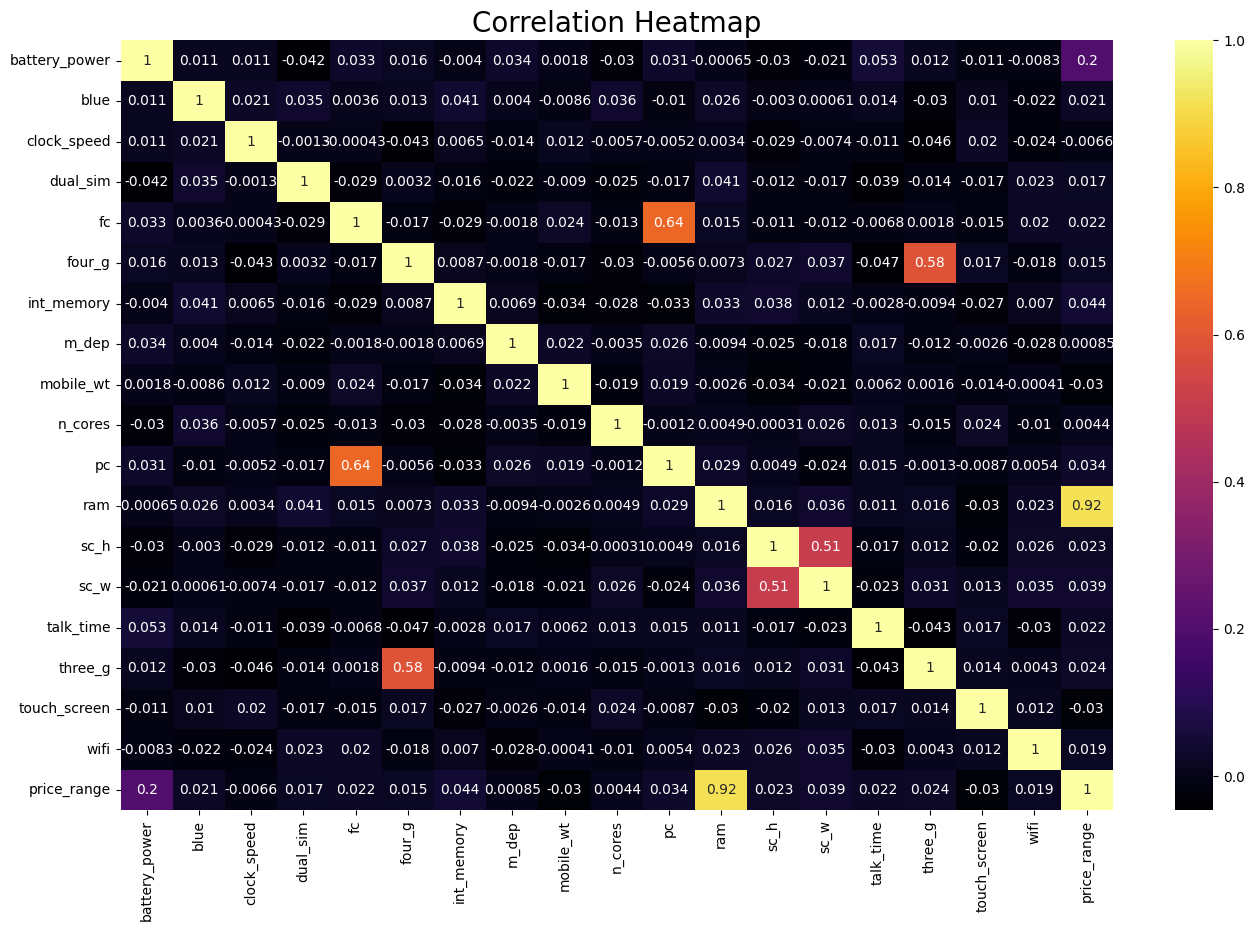

In [183]:
# Visualize the correlation headmap
correlation = mobile_data.corr()
# Creating a heatmap of the correlation matrix
plt.figure(figsize=[16, 10])
sns.heatmap(correlation, cmap='inferno', annot=True, annot_kws={'fontsize': 10})
plt.title('Correlation Heatmap',fontsize=20)
plt.show()


## ◼ **Observation**
 The RAM and price_range show high correlation Which means the strong positive correlation between RAM and price_range indicates that RAM significantly influences mobile phone price range.
However, collinearity exists between pairs like ('pc', 'fc') and ('px_width', 'px_height'). This is reasonable, as a better front camera usually implies a better primary camera, and pixel height correlates with pixel width.




## ▶ **Exploring All Numerical Feature's of the Dataset**

In [153]:
 # Let's see the Numerical columns of our dataset.
numeric_features = list(mobile_data.describe().columns)
numeric_features

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

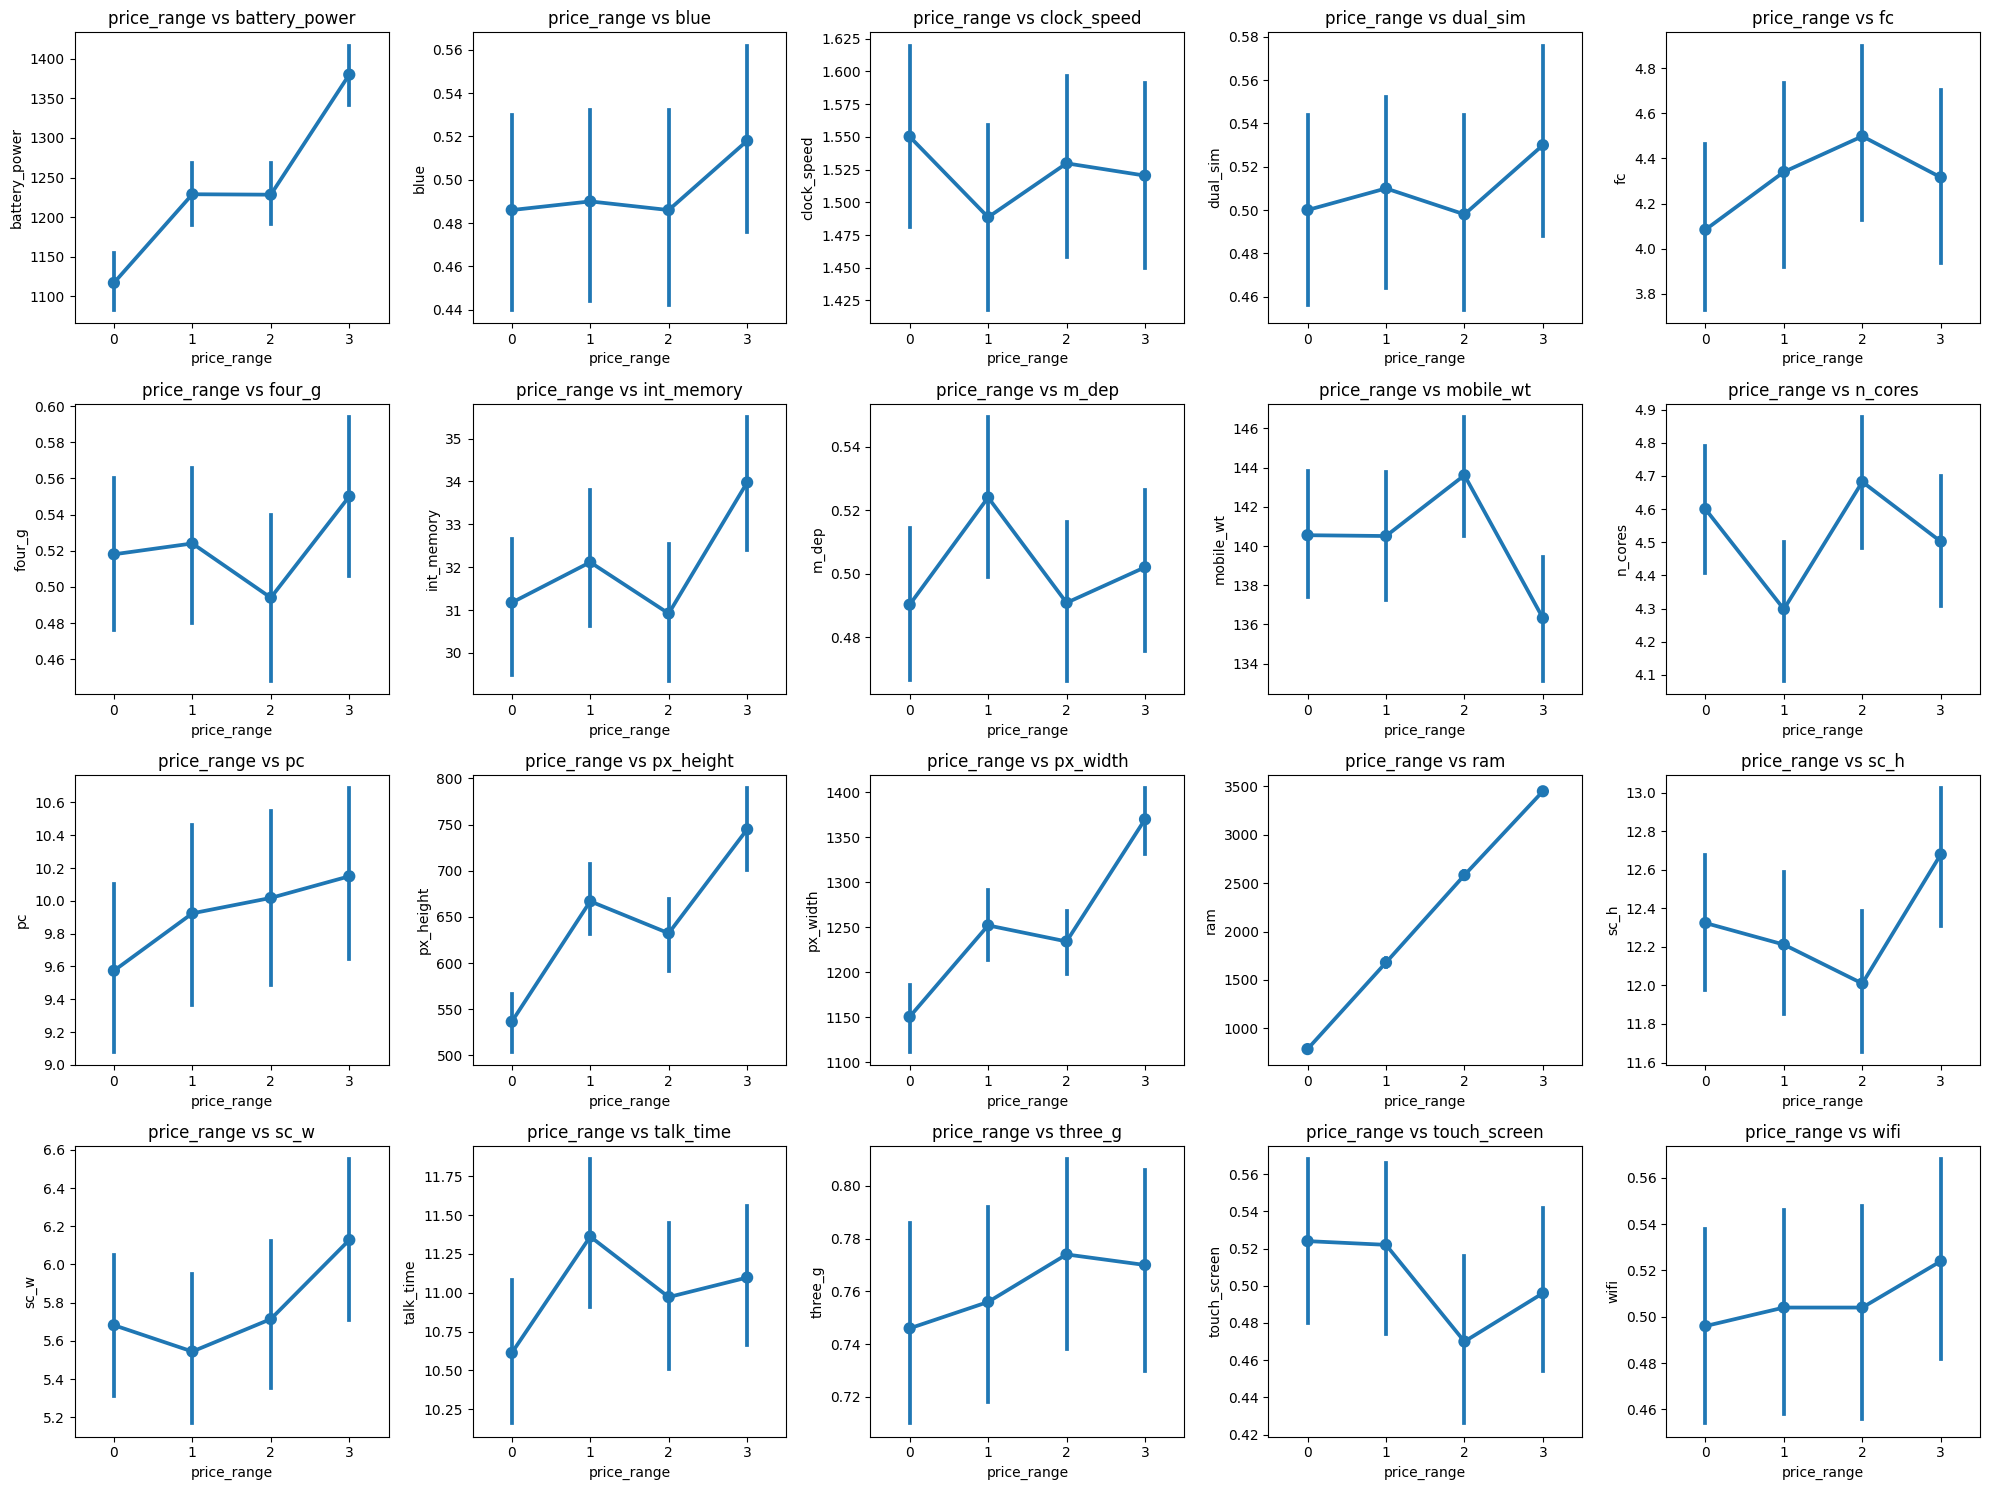

In [154]:
# Visualize the numerical feature
rows=4
cols=5
counter=1
fig = plt.figure(figsize=(20, 15))
for col in numeric_features:
  if col not in ['price_range']:
    # visualize the numerical feratures
    plt.subplot(rows,cols,counter)
    sns.pointplot(x=mobile_data['price_range'], y=mobile_data[col])
    plt.xlabel('price_range')
    plt.ylabel(col)
    plt.grid(False)
    plt.title(f'price_range vs {col}')
    counter=counter+1
    plt.tight_layout()

## ◼ **Observation**
 The price range of the  battery power increases the price of mobile phones and Mobiles phones with high price range is wightless as compaired to other.
 Mobile phones with the largest screen height and width are extremely expensive. A similar case is with px_height and px_width When the resolution of the screen increases the price also increase and the RAM have the strong relationship with price range of mobile phone.


## ▶ **Let's check out the distribution of our each Numerical features**

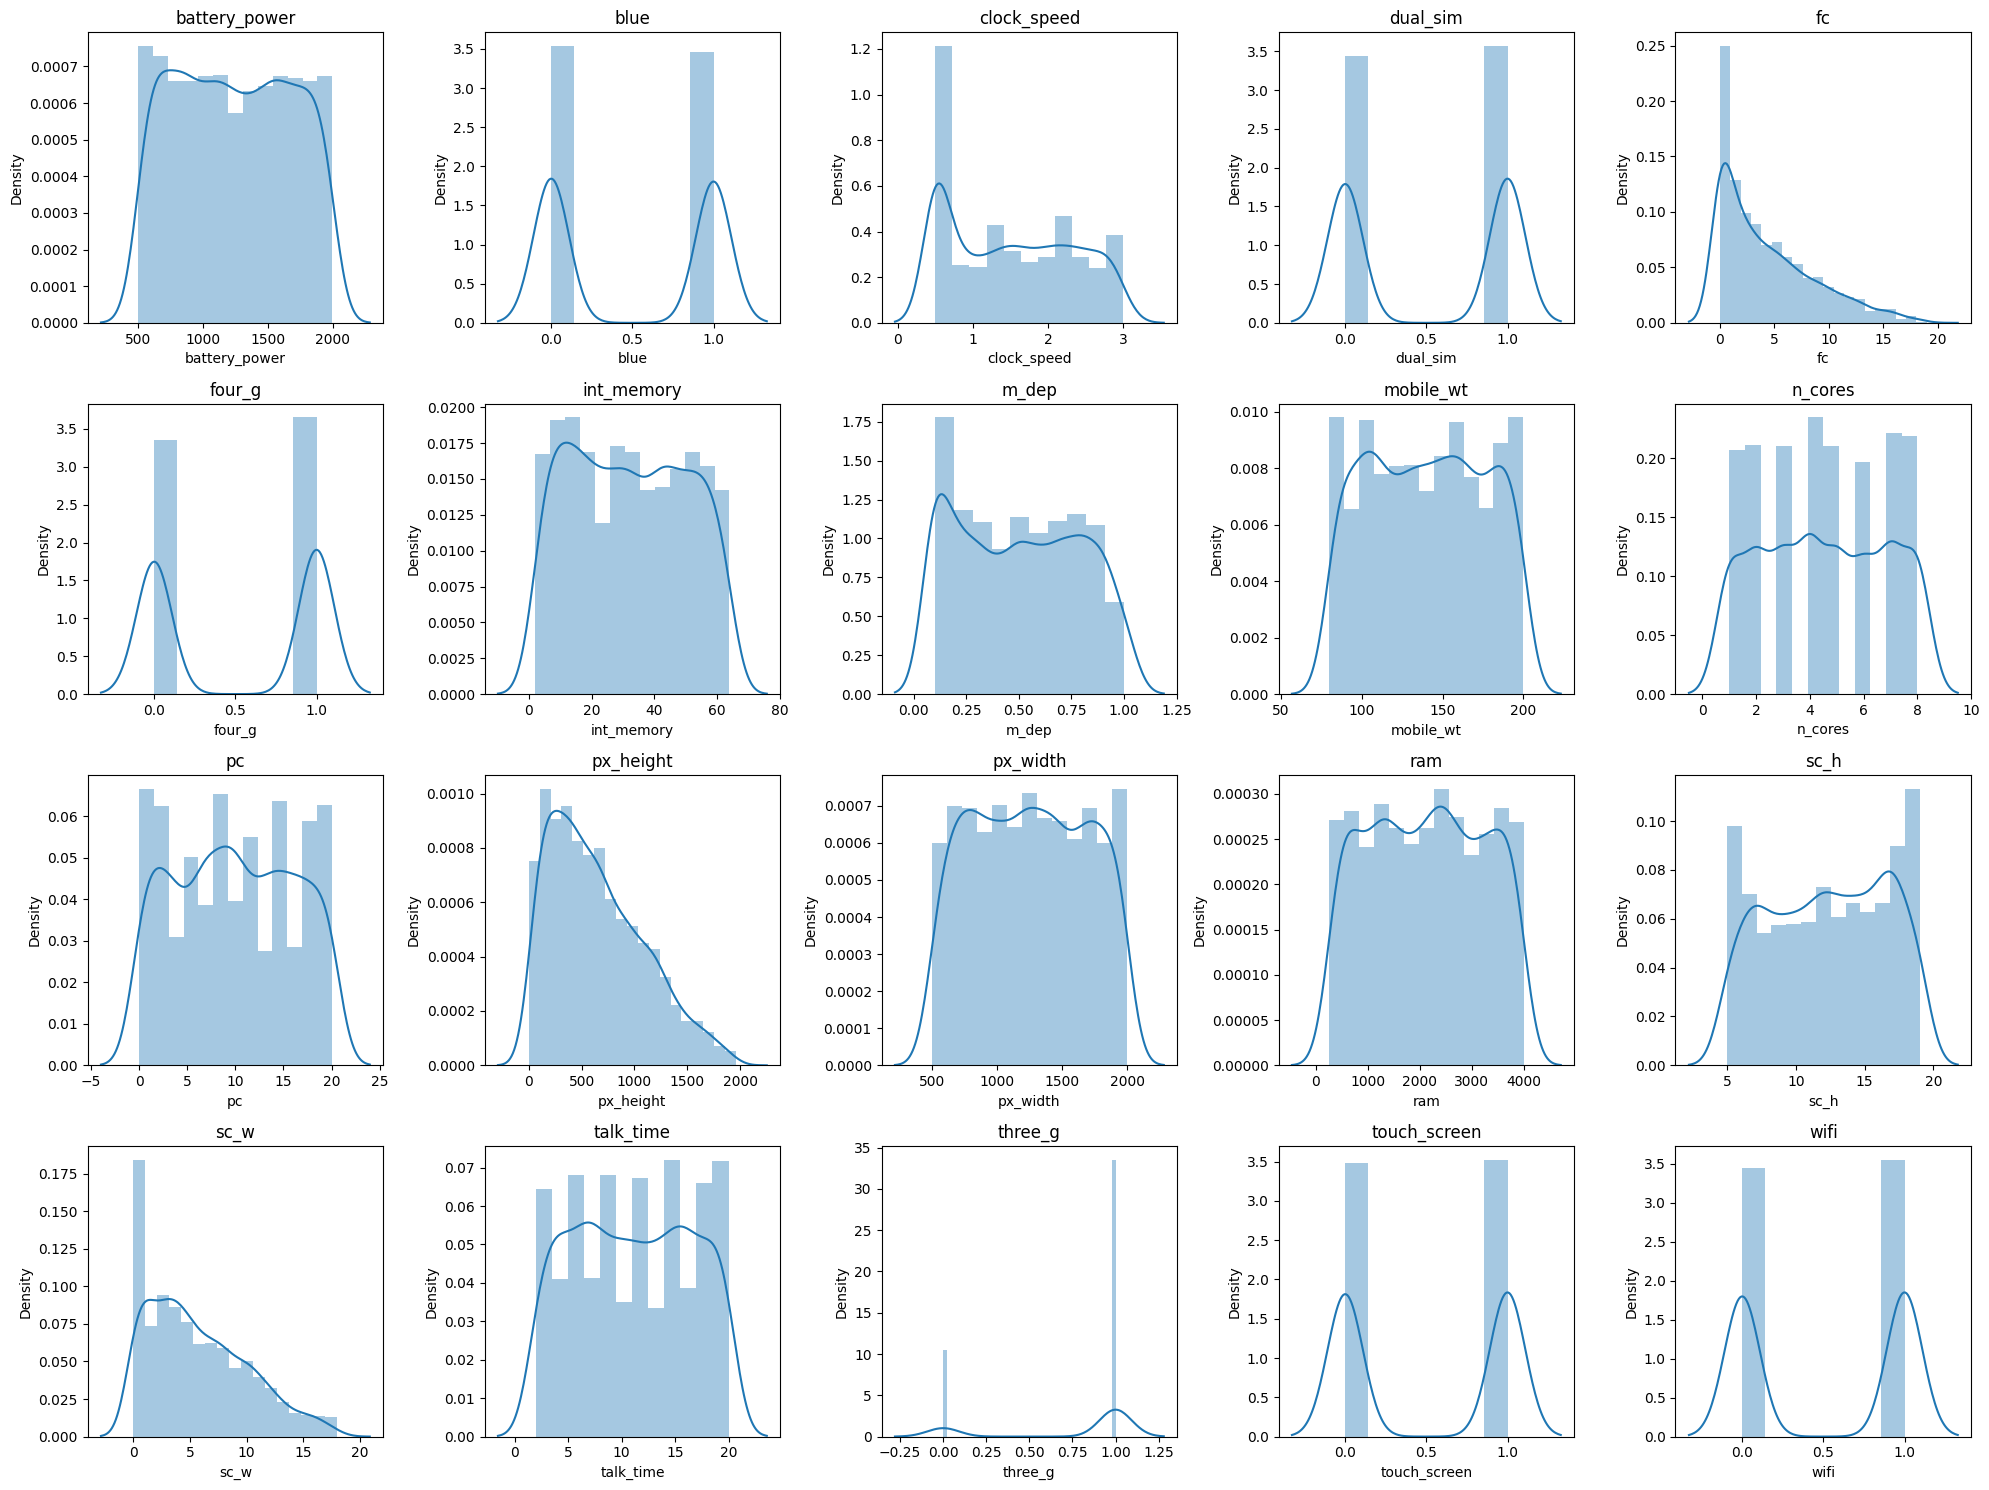

In [155]:
# Visualize the distribution of numerical freatures
rows=4
cols=5
counter=1
fig = plt.figure(figsize=(20, 15))

for col in numeric_features[:-1]:
    plt.subplot(rows,cols,counter)
    feature = mobile_data[col]
    sns.distplot(feature)
    plt.title(col)
    plt.grid(False)
    counter=counter+1
    plt.tight_layout()

 ◼ Most of our features look similar to normal distribution and some features have multi mode because one of those columns has categories, which hold values like 0 or 1.

## ▶ **Outlier Detection**

In [156]:
# outlier detection
outlier_list = ['clock_speed','fc','pc','sc_h','sc_w','int_memory','battery_power','px_height','px_width','ram']

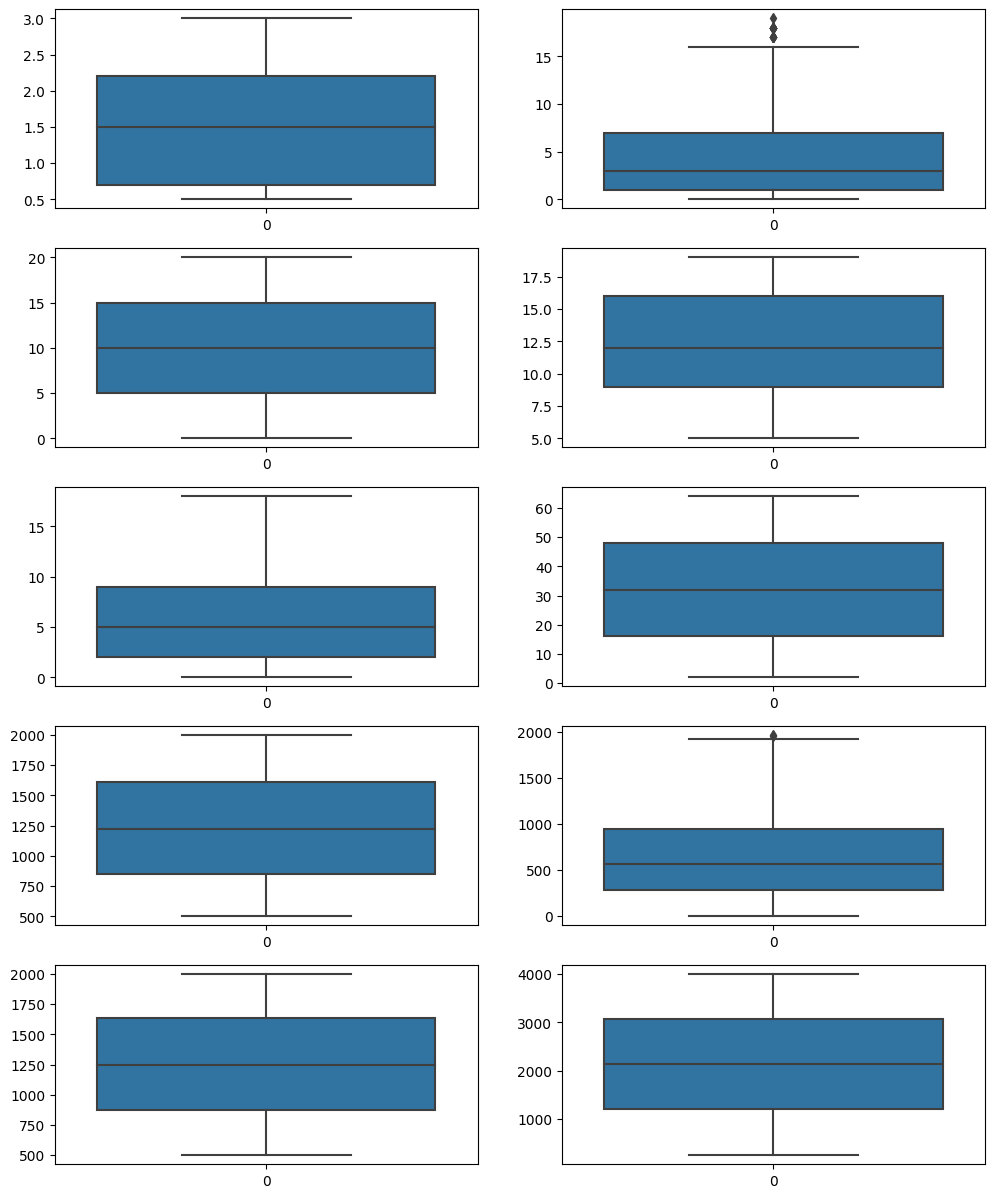

In [157]:
# Viualize the outliers of dataset
plt.figure(figsize=(12,15))
for i in range(len(outlier_list)):
  plt.subplot(5,2,i+1)
  sns.boxplot(mobile_data[outlier_list[i]])

### ◼ As we see, there are not have too many outliers, So we surely go with the further procedure.

# Finding Multicollinearity
### Multicollinearity refers to a situation in which independent variables in a model are highly correlated with each other. It creates issues in interpreting the individual effects of variables and can lead to unstable coefficients and reduced model accuracy. Addressing multicollinearity involves identifying correlated variables and taking steps such as removing or transforming variables.

In [158]:
#checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [159]:
#checking multicolinarity for df
calc_vif(mobile_data[[i for i in mobile_data.describe().columns]])

,variables,VIF
0,battery_power,9.852329
1,blue,1.987643
2,clock_speed,4.353409
3,dual_sim,2.038823
4,fc,3.413647
5,four_g,3.194364
6,int_memory,3.979406
7,m_dep,3.952634
8,mobile_wt,14.709826
9,n_cores,4.707757


### As mobile_wt,px_width,ram,sc_h all this features are important for mobile price in general sense, thats why we are keeping this features.

# Categorical Encoding
### Categorical encoding is not required as all the values are already in either integer or float format.

# Feature Manipulation & Selection
### Feature Manipulation & Selection is not required in our dataset.

# Data Transformation

In [160]:
# Transform Your data
# Selecting features to avoid overfitting

mobile_data.drop(['px_height', 'px_width'], axis = 1, inplace = True)

# Defining X and y

X = mobile_data.drop(['price_range'], axis = 1)
y = mobile_data['price_range']

### I have decided to remove the variables px_height and px_width from my data because they have minimal impact on the dependent variable, which is the price range.

# Data Splitting, Training and Testing

In [184]:
# Splitting dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)

# Finding X_train and y_train shape
print(f'shape of X_train is - {X_train.shape}')
print(f'shape of y_train is - {y_train.shape}')

X = pd.DataFrame(X)

shape of X_train is - (1500, 18)
shape of y_train is - (1500,)


# Data Scaling

In [162]:
# data scaling
scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

# **⬛ Data Modelling**

# ML Model - 1 | Logistic Regression

In [163]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Fit the Algorithm
log_reg.fit(X_train, y_train)

# Predict on the model
y_pred_test = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

In [164]:
# see the accuracy scores
train_accuracy = accuracy_score(y_pred_train,y_train)
test_accuracy = accuracy_score(y_pred_test,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.83
The accuracy on test data is  0.812


Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       380
           1       0.79      0.74      0.76       374
           2       0.76      0.75      0.76       386
           3       0.88      0.90      0.89       360

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500

[[357  23   0   0]
 [ 46 275  53   0]
 [  0  50 290  46]
 [  0   0  37 323]]


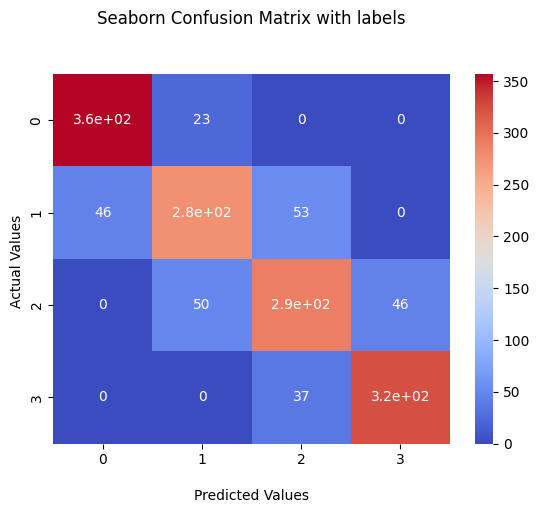

In [165]:
#classification report and confusion matrix on train dataset

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print(classification_report( y_train,y_pred_train))

# Generating the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_train, y_pred_train)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Displaying the visualization of the Confusion Matrix
plt.show()

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       120
           1       0.81      0.74      0.77       126
           2       0.70      0.67      0.68       114
           3       0.84      0.89      0.86       140

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500

[[113   7   0   0]
 [ 17  93  16   0]
 [  0  15  76  23]
 [  0   0  16 124]]


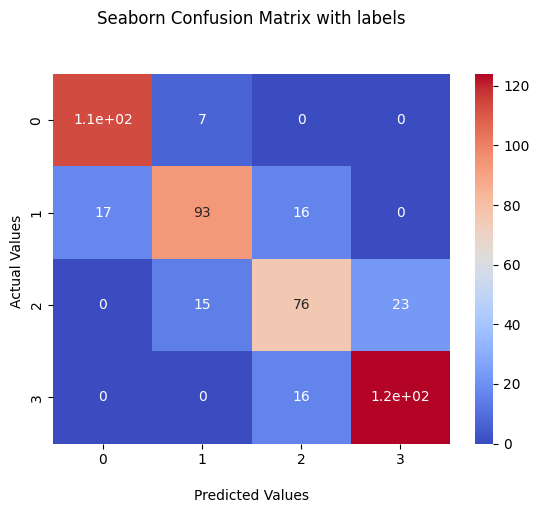

In [166]:
#classification report and confusion matrix on test dataset

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_test,y_pred_test))

# Generating the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Displaying the visualization of the Confusion Matrix
plt.show()

### The training accuracy score is 83%, while the testing accuracy score is 81%.
### For the test dataset,
### a. We obtained a low(0) price precision of 87%, a recall of 94%, and a f1-score of 90%.
### b. We obtained a medium(1) price precision of 81%, a recall of 77%, and a f1-score of 74%.
### c. We received a High(2) price precision of 70%, a recall of 67%, and a f1-score of 68%.
### d. We obtained a very high (3) price precision of 84%, recall of 89%, and f1-score of 86%.

# ML Model - 2 | Decision Tree Classifier

In [167]:
# ML Model - 2 Implementation
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the Algorithm
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

# Cross- Validation & Hyperparameter Tuning

In [168]:
# cross validation and hyperparameter tuning
parameters={"splitter":["best","random"],
            "max_depth" : [7,8,9,10],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
dtr_grid=GridSearchCV(decision_tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
dtr_grid.fit(X_train,y_train)

Fitting 3 folds for each of 800 candidates, totalling 2400 fits
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-0.262 total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-0.264 total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-0.228 total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=-0.200 total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=-0.272 total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=-0.278 total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=-0.270 total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=-0.250 total time=   0.0s
[CV 3/3] E

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [169]:
# Printing the best params and best score
print('The best parameters values is found out to be :' ,dtr_grid.best_params_)
print('The neg_mean_squared_error score using the same parameters values is :', dtr_grid.best_score_)

The best parameters values is found out to be : {'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_leaf': 6, 'splitter': 'random'}
The neg_mean_squared_error score using the same parameters values is : -0.20533333333333334


In [170]:
#  predict train and test value using decision tree
Y_pred_dtr_train=dtr_grid.predict(X_train)
Y_pred_dtr_test = dtr_grid.predict(X_test)


Classification report for Decision Tree (Train set)= 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       380
           1       0.68      0.72      0.70       374
           2       0.76      0.68      0.72       386
           3       0.87      0.88      0.88       360

    accuracy                           0.79      1500
   macro avg       0.79      0.79      0.79      1500
weighted avg       0.79      0.79      0.79      1500

[[333  47   0   0]
 [ 65 268  41   0]
 [  0  77 262  47]
 [  0   0  42 318]]


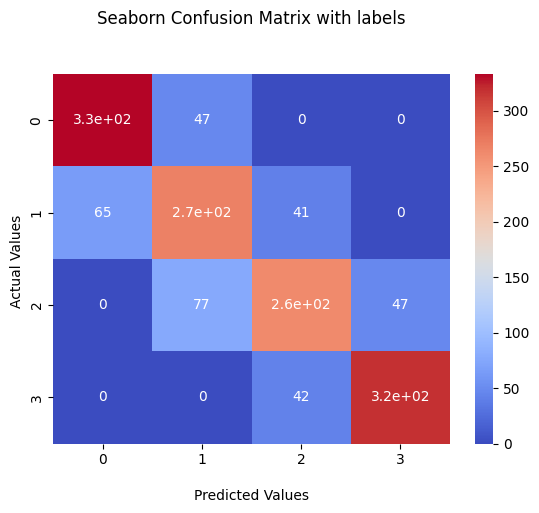

In [171]:
#classification report and confusion matrix on train dataset

from sklearn.metrics import classification_report
print('Classification report for Decision Tree (Train set)= ')
print(classification_report( y_train,Y_pred_dtr_train))

# Generating the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_train, Y_pred_dtr_train)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Displaying the visualization of the Confusion Matrix
plt.show()

Classification report for Decision Tree  (Test set)= 
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       120
           1       0.73      0.79      0.76       126
           2       0.64      0.63      0.64       114
           3       0.85      0.79      0.82       140

    accuracy                           0.77       500
   macro avg       0.77      0.77      0.77       500
weighted avg       0.78      0.77      0.77       500

[[105  15   0   0]
 [ 16  99  11   0]
 [  0  22  72  20]
 [  0   0  29 111]]


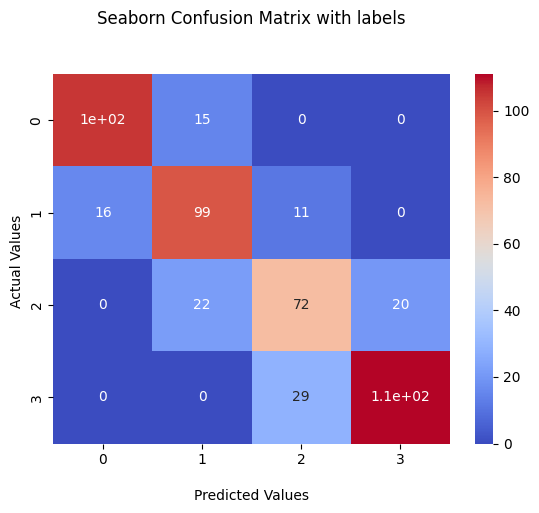

In [172]:
#classification report and confusion matrix on test dataset

from sklearn.metrics import classification_report
print('Classification report for Decision Tree  (Test set)= ')
print(classification_report(y_test,Y_pred_dtr_test))

# Generating the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, Y_pred_dtr_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Displaying the visualization of the Confusion Matrix
plt.show()

### The training accuracy score is 79%, while the testing accuracy score is 77%.
### For the test dataset,
### a. We obtained a low(0) price precision of 87%, a recall of 88%, and a f1-score of 87%.
### b. We obtained a medium(1) price precision of 73%, a recall of 79%, and a f1-score of 76%.
### c. We received a High(2) price precision of 64%, a recall of 63%, and a f1-score of 64%.
### d. We obtained a very high (3) price precision of 85%, recall of 79%, and f1-score of 82%.

# ML Model - 3 | Support Vector Machine(SVM)

In [173]:
# ML Model - 3 Implementation
svcmodel = SVC(probability=True)

# Fit the Algorithm
svcmodel.fit(X_train, y_train)

SVC(probability=True)

In [174]:
# Predict on the model
y_pred_svc_test = svcmodel.predict(X_test)
y_pred_svc_train = svcmodel.predict(X_train)

In [175]:
# see the accuracy scores
train_accuracy = accuracy_score(y_pred_svc_train,y_train)
test_accuracy = accuracy_score(y_pred_svc_test,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9006666666666666
The accuracy on test data is  0.752


Classification report for SVC (Train set)= 
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       380
           1       0.88      0.86      0.87       374
           2       0.87      0.89      0.88       386
           3       0.94      0.91      0.93       360

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500

[[360  20   0   0]
 [ 33 320  21   0]
 [  0  22 343  21]
 [  0   0  32 328]]


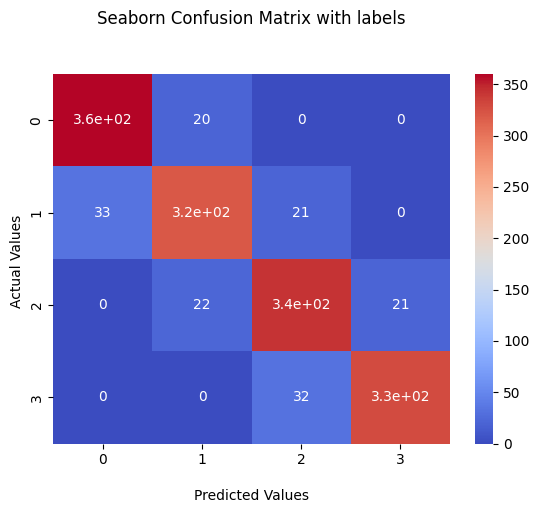

In [176]:
#classification report and confusion matrix on train dataset

from sklearn.metrics import classification_report
print('Classification report for SVC (Train set)= ')
print(classification_report( y_train,y_pred_svc_train))

# Generating the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_train, y_pred_svc_train)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Displaying the visualization of the Confusion Matrix
plt.show()

Classification report for SVC  (Test set)= 
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       120
           1       0.71      0.62      0.66       126
           2       0.61      0.68      0.64       114
           3       0.88      0.80      0.84       140

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.76      0.75      0.75       500

[[109  11   0   0]
 [ 26  78  22   0]
 [  0  21  77  16]
 [  0   0  28 112]]


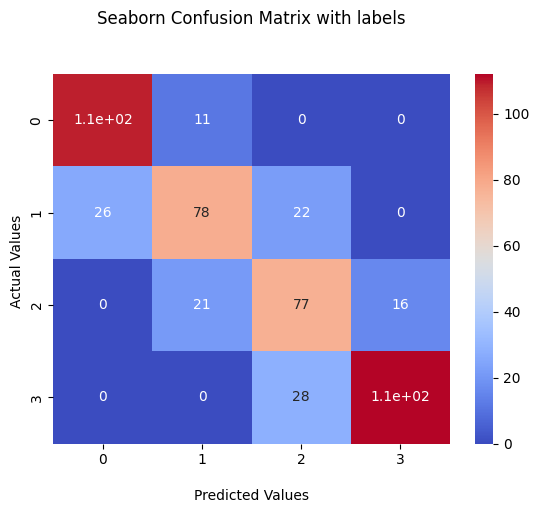

In [177]:
#classification report and confusion matrix on test dataset

from sklearn.metrics import classification_report
print('Classification report for SVC  (Test set)= ')
print(classification_report(y_test,y_pred_svc_test))

# Generating the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_svc_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Displaying the visualization of the Confusion Matrix
plt.show()

### The training accuracy score is 90%, while the testing accuracy score is 75%.

### For the test dataset,

### a. We obtained a low(0) price precision of 81%, a recall of 91%, and a f1-score of 85%.

### b. We obtained a medium(1) price precision of 71%, a recall of 62%, and a f1-score of 66%.

### c. We received a High(2) price precision of 61%, a recall of 68%, and a f1-score of 64%.

### d. We obtained a very high (3) price precision of 88%, recall of 80%, and f1-score of 84%.

# Which Model is most accurate?

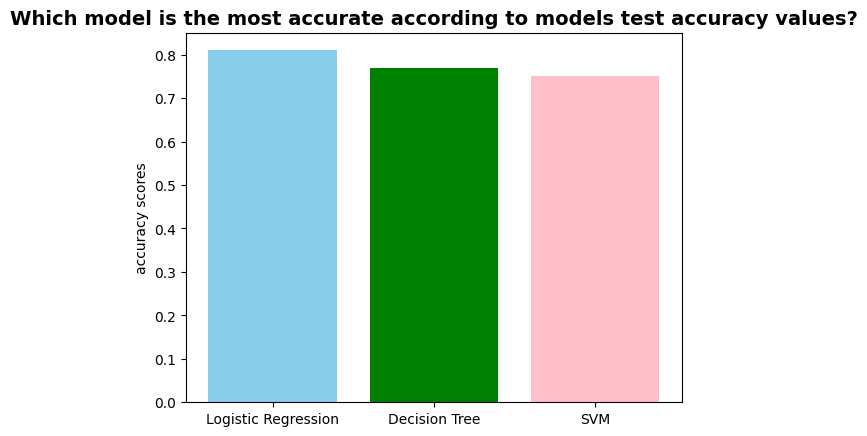

In [185]:
models = ['Logistic Regression', 'Decision Tree','SVM']
acc_scores = [0.81,0.77,0.75]

plt.bar(models, acc_scores, color=['skyblue', 'green', 'pink',])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate according to models test accuracy values?",fontweight ='bold', size = 14)
plt.show()

# Which hyperparameter optimization technique have you used and why?
### GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance. In GridSearchCV, along with Grid Search cross-validation is also performed and cross-Validation is used while training the model. Our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.

# ▶ Which Evaluation metrics did you consider for a positive business impact and why?
### We used Classification Report, Accuracy Score and Confusion Matrix These metrics offer insights into the model's performance and its ability to make accurate predictions.We  choose Confusion Matrix as it visualizes the model's performance in terms of true positives, true negatives, false positives, and false negatives.It offers insights into the types of errors the model is making, which can be vital for making informed decisions and adjusting strategies.

# Which ML model did you choose from the above created models as your final prediction model and why?
### Based on the evaluation results, the Logistic Regression model is the best prediction model, because it has the highest score in terms of accuracy score for testing dataset and the other models are equally good at predicting the target variable.